# Random Mandala Python package

***Anton Antonov***    
[Python-packages at GitHub/antononcube](https://github.com/antononcube/Python-packages)   
***November 2021***
***February 2022***

## Introduction

This Python package implements the function `random_mandala` that generates plots (and images) of random mandalas.

The design, implementation *strategy*, and unit tests closely resemble the Wolfram Repository Function (WFR)
[`RandomMandala`](https://resources.wolframcloud.com/FunctionRepository/resources/RandomMandala),
[AAf1].

(Another, very similar function at WFR is
[`RandomScribble`](https://resources.wolframcloud.com/FunctionRepository/resources/RandomScribble), [AAf2].)

The Bezier mandala seeds are created using the Python package
[`bezier`](https://pypi.org/project/bezier/),
[DHp1].

For detailed descriptions of Machine Learning studies that use collections of random mandalas see the articles
[AA1, AA2].

------

## Installation

To install from GitHub use the shell command:

```shell
python -m pip install git+https://github.com/antononcube/Python-packages.git#egg=RandomMandala\&subdirectory=RandomMandala
```

To install from PyPI:

```shell
python -m pip install RandomMandala
```

------

## Details and arguments

- The mandalas made by `random_mandala` are generated through rotational symmetry of a “seed segment”. 

- The function `random_mandala` returns `matplotlib` figures (objects of type `matplotlib.figure.Figure`)

- The function `random_mandala` can be given arguments of the creation function `matplotlib.pyplot.figure`.

- If `n_rows` and `n_columns` are `None` a `matplotlib` figure object with one axes object is returned.

- There are two modes of making random mandalas: (i) single-mandala mode and (ii) multi-mandala mode. The multi-mandala mode is activated by giving the `radius` argument a list of positive numbers.

- If the argument `radius` is a list of positive reals, then a "multi-mandala" is created
  with the mandalas corresponding to each number in the radius list being overlain.  

- Here are brief descriptions of the arguments:

  - `n_rows`: Number of rows in the result figure.

  - `n_columns`: Number of columns in the result figure.

  - `radius`: Radius for the mandalas, a flot or a list of floats. If a list of floats the   mandalas are overlain.

  - `rotational_symmetry_order`: Number of copies of the seed segment that comprise the mandala.

  - `connecting_function`: Connecting function, one of "line", "fill", "bezier", "bezier_fill", "random", or `None`. If 'random' or `None` a random choice of the rest of values is made.

  - `number_of_elements`: Controls how may graphics elements are in the seed segment.

  - `symmetric_seed`: Specifies should the seed segment be symmetric or not.
    If 'random' of None random choice between `True` and `False` is made.

  - `face_color`: Face (fill) color.

  - `edge_color`: Edge (line) color.

-----

## Examples

Load the package `RandomMandala`, `matplotlib`, and `PIL`:

In [28]:
from RandomMandala import random_mandala, figure_to_image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm
from PIL import Image, ImageOps
from mpl_toolkits.axes_grid1 import ImageGrid
import random

Here we generate a random mandala:

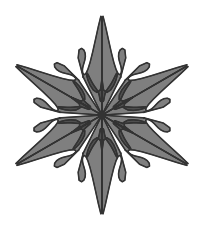

In [29]:
random.seed(99)
fig = random_mandala()

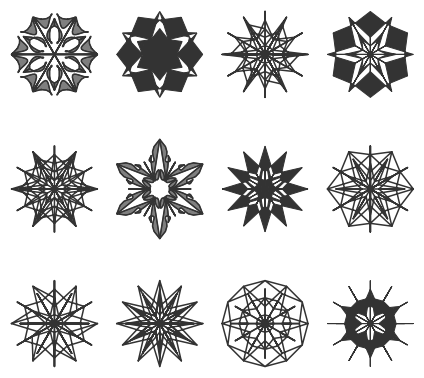

In [30]:
random.seed(33)
fig2 = random_mandala(n_rows=3, n_columns=4, figsize=(6,6))
fig2.tight_layout()
plt.show()

------

## Arguments details

### n_rows, n_columns

With the argument `n_rows` and `n_columns` are specified the number of rows and columns respectively in the figure object; `n_rows * n_columns` mandalas are generated:

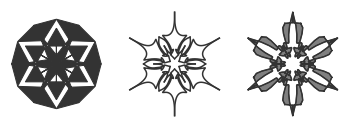

In [31]:
random.seed(22)
fig=random_mandala(n_rows=1, n_columns=3)

### connecting_function

The argument `connecting_function` specifies which graphics primitives to be used over the seed segment points:

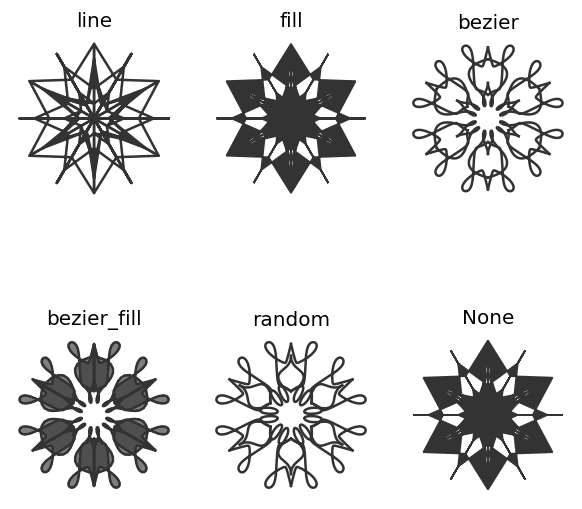

In [32]:
fig = matplotlib.pyplot.figure(figsize=(6, 6), dpi=120)

k = 1
for cf in ['line', 'fill', 'bezier', 'bezier_fill', 'random', None]:
    random.seed(667)
    fig = random_mandala(connecting_function=cf,
                         figure=fig,
                         location=(2, 3, k))
    ax = fig.axes[-1]
    ax.set_title(str(cf))
    k = k + 1
plt.show()
plt.close(fig)

With values `None` or `"random"` a random choice is made from `['line', 'fill', 'bezier', 'bezier_fill']`.

### radius

In single-mandala mode the argument `radius` specifies the radius of the seed segment and the mandala:

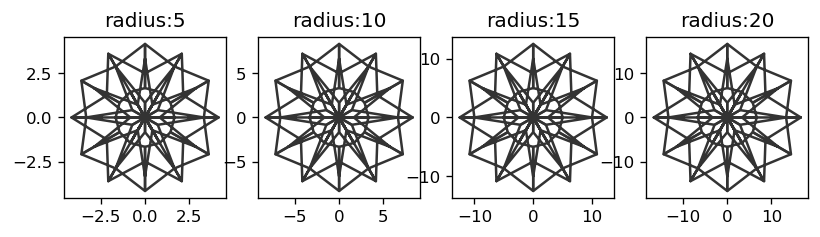

In [33]:
fig = matplotlib.pyplot.figure(figsize=(8, 4), dpi=120)
k = 1
for r in [5, 10, 15, 20]:
    random.seed(2)
    fig = random_mandala(connecting_function="line", 
                         radius=r,
                         figure = fig,
                         location = (1, 4, k))
    ax = fig.axes[-1]
    ax.set_title("radius:" + str(r))
    ax.axis("on")
    k = k + 1
plt.show()
plt.close(fig)

If the value given to `radius` is a list of positive numbers then multi-mandala mode is used.
If `radius=[r[0],...,r[k]]`, then for each `r[i]` is made a mandala with radius `r[i]` and the mandalas are drawn upon each other according to their radii order:

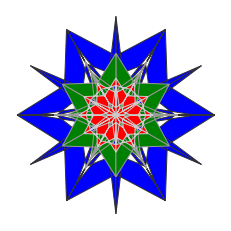

In [34]:
random.seed(99)
fig3=random_mandala(radius=[8,5,3], 
                    face_color=["blue", "green", 'red'],
                    connecting_function="fill")                

**Remark:** The code above used different colors for the different radii.

### rotational_symmetry_order

The argument `rotational_symmetry_order` specifies how many copies of the seed segment comprise the mandala:

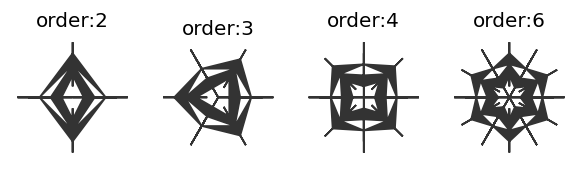

In [35]:
fig = matplotlib.pyplot.figure(figsize=(6, 12), dpi=120)
k = 1
for rso in [2, 3, 4, 6]:
    random.seed(122)
    fig = random_mandala(connecting_function="fill", 
                         symmetric_seed=True,
                         rotational_symmetry_order=rso,
                         figure = fig,
                         location = (1, 4, k))
    ax = fig.axes[-1]
    ax.set_title("order:" + str(rso))
    k = k + 1
plt.show()
plt.close(fig)


### number_of_elements

The argument `number_of_elements` controls how may graphics elements are in the seed segment:

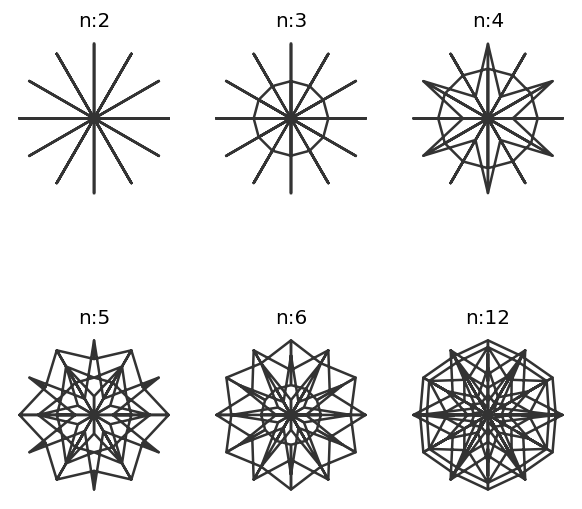

In [36]:
fig = matplotlib.pyplot.figure(figsize=(6, 6), dpi=120)
k = 1
for ne in [2, 3, 4, 5, 6, 12]:
    random.seed(2)
    fig = random_mandala(connecting_function="line",
                         symmetric_seed=True,
                         rotationa_symmetry_order=6,
                         number_of_elements=ne,
                         figure = fig,
                         location = (2, 3, k))
    ax = fig.axes[-1]
    ax.set_title("n:" + str(ne))
    k = k + 1
plt.show()
plt.close(fig)

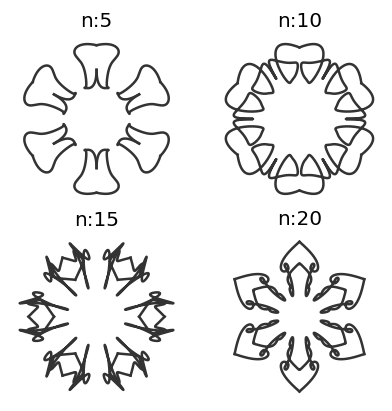

In [37]:
fig = matplotlib.pyplot.figure(figsize=(4, 4), dpi=120)
k = 1
for ne in [5, 10, 15, 20]:
    random.seed(26)
    fig = random_mandala(connecting_function="bezier",
                         radius=[1],
                         symmetric_seed=True,
                         rotationa_symmetry_order=6,
                         number_of_elements=ne,
                         figure = fig,
                         location = (2, 2, k))
    ax = fig.axes[-1]
    ax.set_title("n:" + str(ne))
    k = k + 1
plt.show()
plt.close(fig)

### symmetric_seed

The argument `symmetric_seed` specifies should the seed segment be symmetric or not:

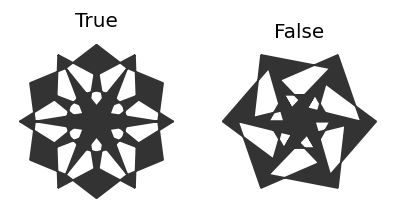

In [38]:
fig = matplotlib.pyplot.figure(figsize=(4, 4), dpi=120)
k = 1
for ssd in [True, False]:
    random.seed(2)
    fig = random_mandala(connecting_function="fill", 
                         symmetric_seed=ssd,
                         figure = fig,
                         location = (1, 2, k))
    ax = fig.axes[-1]
    ax.set_title(str(ssd))
    k = k + 1
plt.show()
plt.close(fig)

### face_color and edge_color

The arguments `face_color` and `edge_color` take as values strings or list of strings that specify the coloring of the filled-in polygons and lines respectively:

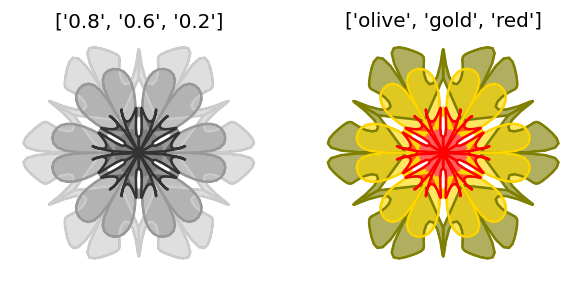

In [39]:
fig = matplotlib.pyplot.figure(figsize=(6,3), dpi=120)
k = 1
for fc in [["0.8", "0.6", "0.2"], ["olive", "gold", "red"]]:
    random.seed(11)
    fig = random_mandala(radius=[10,6,4],
     					 connecting_function="bezier_fill", 
                         symmetric_seed=True,
                         face_color=fc,
                         figure = fig,
                         location = (1, 2, k))
    ax = fig.axes[-1]
    ax.set_title(str(fc))
    k = k + 1
    
plt.show()
plt.close(fig)

### alpha

The argument `alpha` controls the opacity of the plots; it takes as values `None` and floats between 0 and 1.

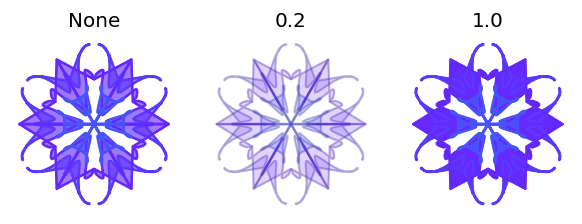

In [40]:
fig = matplotlib.pyplot.figure(figsize=(6,3), dpi=120)
k = 1
for al in [None, 0.2, 1.0]:
    random.seed(23)
    fig = random_mandala(radius=[10,6,4],
     					 connecting_function="bezier_fill",
                         symmetric_seed=True,
                         alpha=al,
                         color_mapper=matplotlib.cm.rainbow_r,
                         figure = fig,
                         location = (1, 3, k))
    ax = fig.axes[-1]
    ax.set_title(str(al))
    k = k + 1

plt.show()
plt.close(fig)

### color_mapper

The argument `color_mapper` takes as values `None` and `matplotlib.colors.Colormap` objects.
See the color mappers in the reference page ["color example code: colormaps_reference.py"](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html).
If `color_mapper` is specified then the arguments `face_color` and `edge_color` are ignored.
Here is an example using two color mappers:

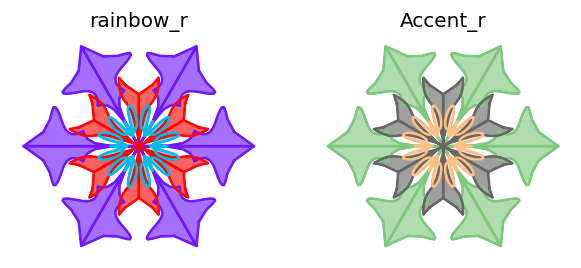

In [41]:
fig = matplotlib.pyplot.figure(figsize=(6,3), dpi=120)
cMappers=[matplotlib.cm.rainbow_r, matplotlib.cm.Accent_r]
cMappersNames=["rainbow_r", "Accent_r"]
for k in range(2): 
    random.seed(15)
    fig = random_mandala(radius=[10,6,4],
                         connecting_function="bezier_fill",
                         symmetric_seed=True,
                         color_mapper=cMappers[k],
                         figure = fig,
                         location = (1, 2, k+1))
    ax = fig.axes[-1]
    ax.set_title(cMappersNames[k])
    
plt.show()
plt.close(fig)

------

## Applications

### Generate a collection of images

In certain Machine Learning (ML) studies it can be useful to be able to generate large enough collections of (random) images. 

In the code block below we: 
- Generate 64 random mandala *plots*
- Convert them into `PIL` images using the package function `figure_to_image`
- Invert and binarize images
- Plot the images in an image grid

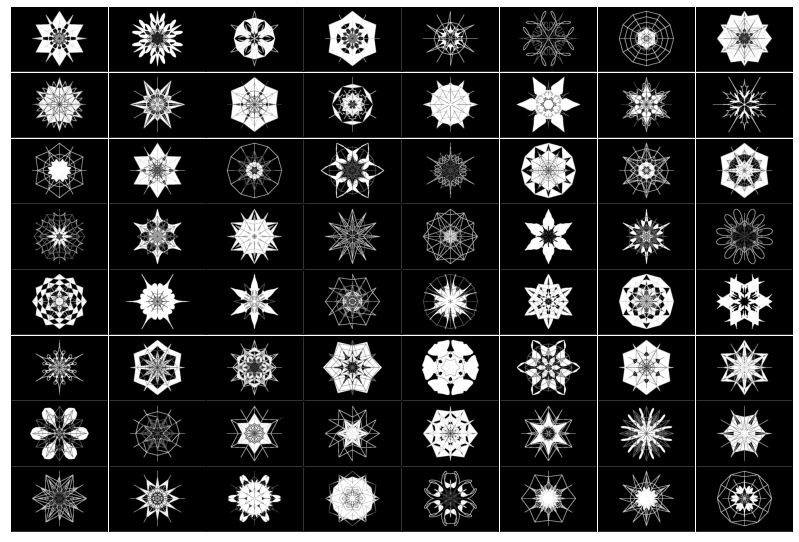

In [42]:
# A list to accumulate random mandala images
mandala_images = []

# Generation loop
random.seed(443)
for i in range(64):
    
    # Generate one random mandala figure
    fig2 = random_mandala(n_rows=None,
                          n_columns=None,
                          radius=[8, 6, 3],
                          rotational_symmetry_order=6,
                          symmetric_seed=True,
                          connecting_function='random',
                          face_color="0.")
    fig2.tight_layout()
    
    # Convert the figure into an image and add it to the list
    mandala_images = mandala_images + [figure_to_image(fig2)]
    
    # Close figure to save memoru
    plt.close(fig2)

# Invert image colors    
mandala_images2 = [ImageOps.invert(img) for img in mandala_images]

# Binarize images
mandala_images3 = [im.convert('1') for im in mandala_images2]

# Make a grid of images and display it
fig3 = plt.figure(figsize=(14., 14.))
grid = ImageGrid(fig3, 111,
                 nrows_ncols=(8, 8),
                 axes_pad=0.02,
                 )

for ax, img in zip(grid, mandala_images3):
    ax.imshow(img)
    ax.set(xticks=[], yticks=[])

plt.show()

## Neat examples
    
### A table of random mandalas

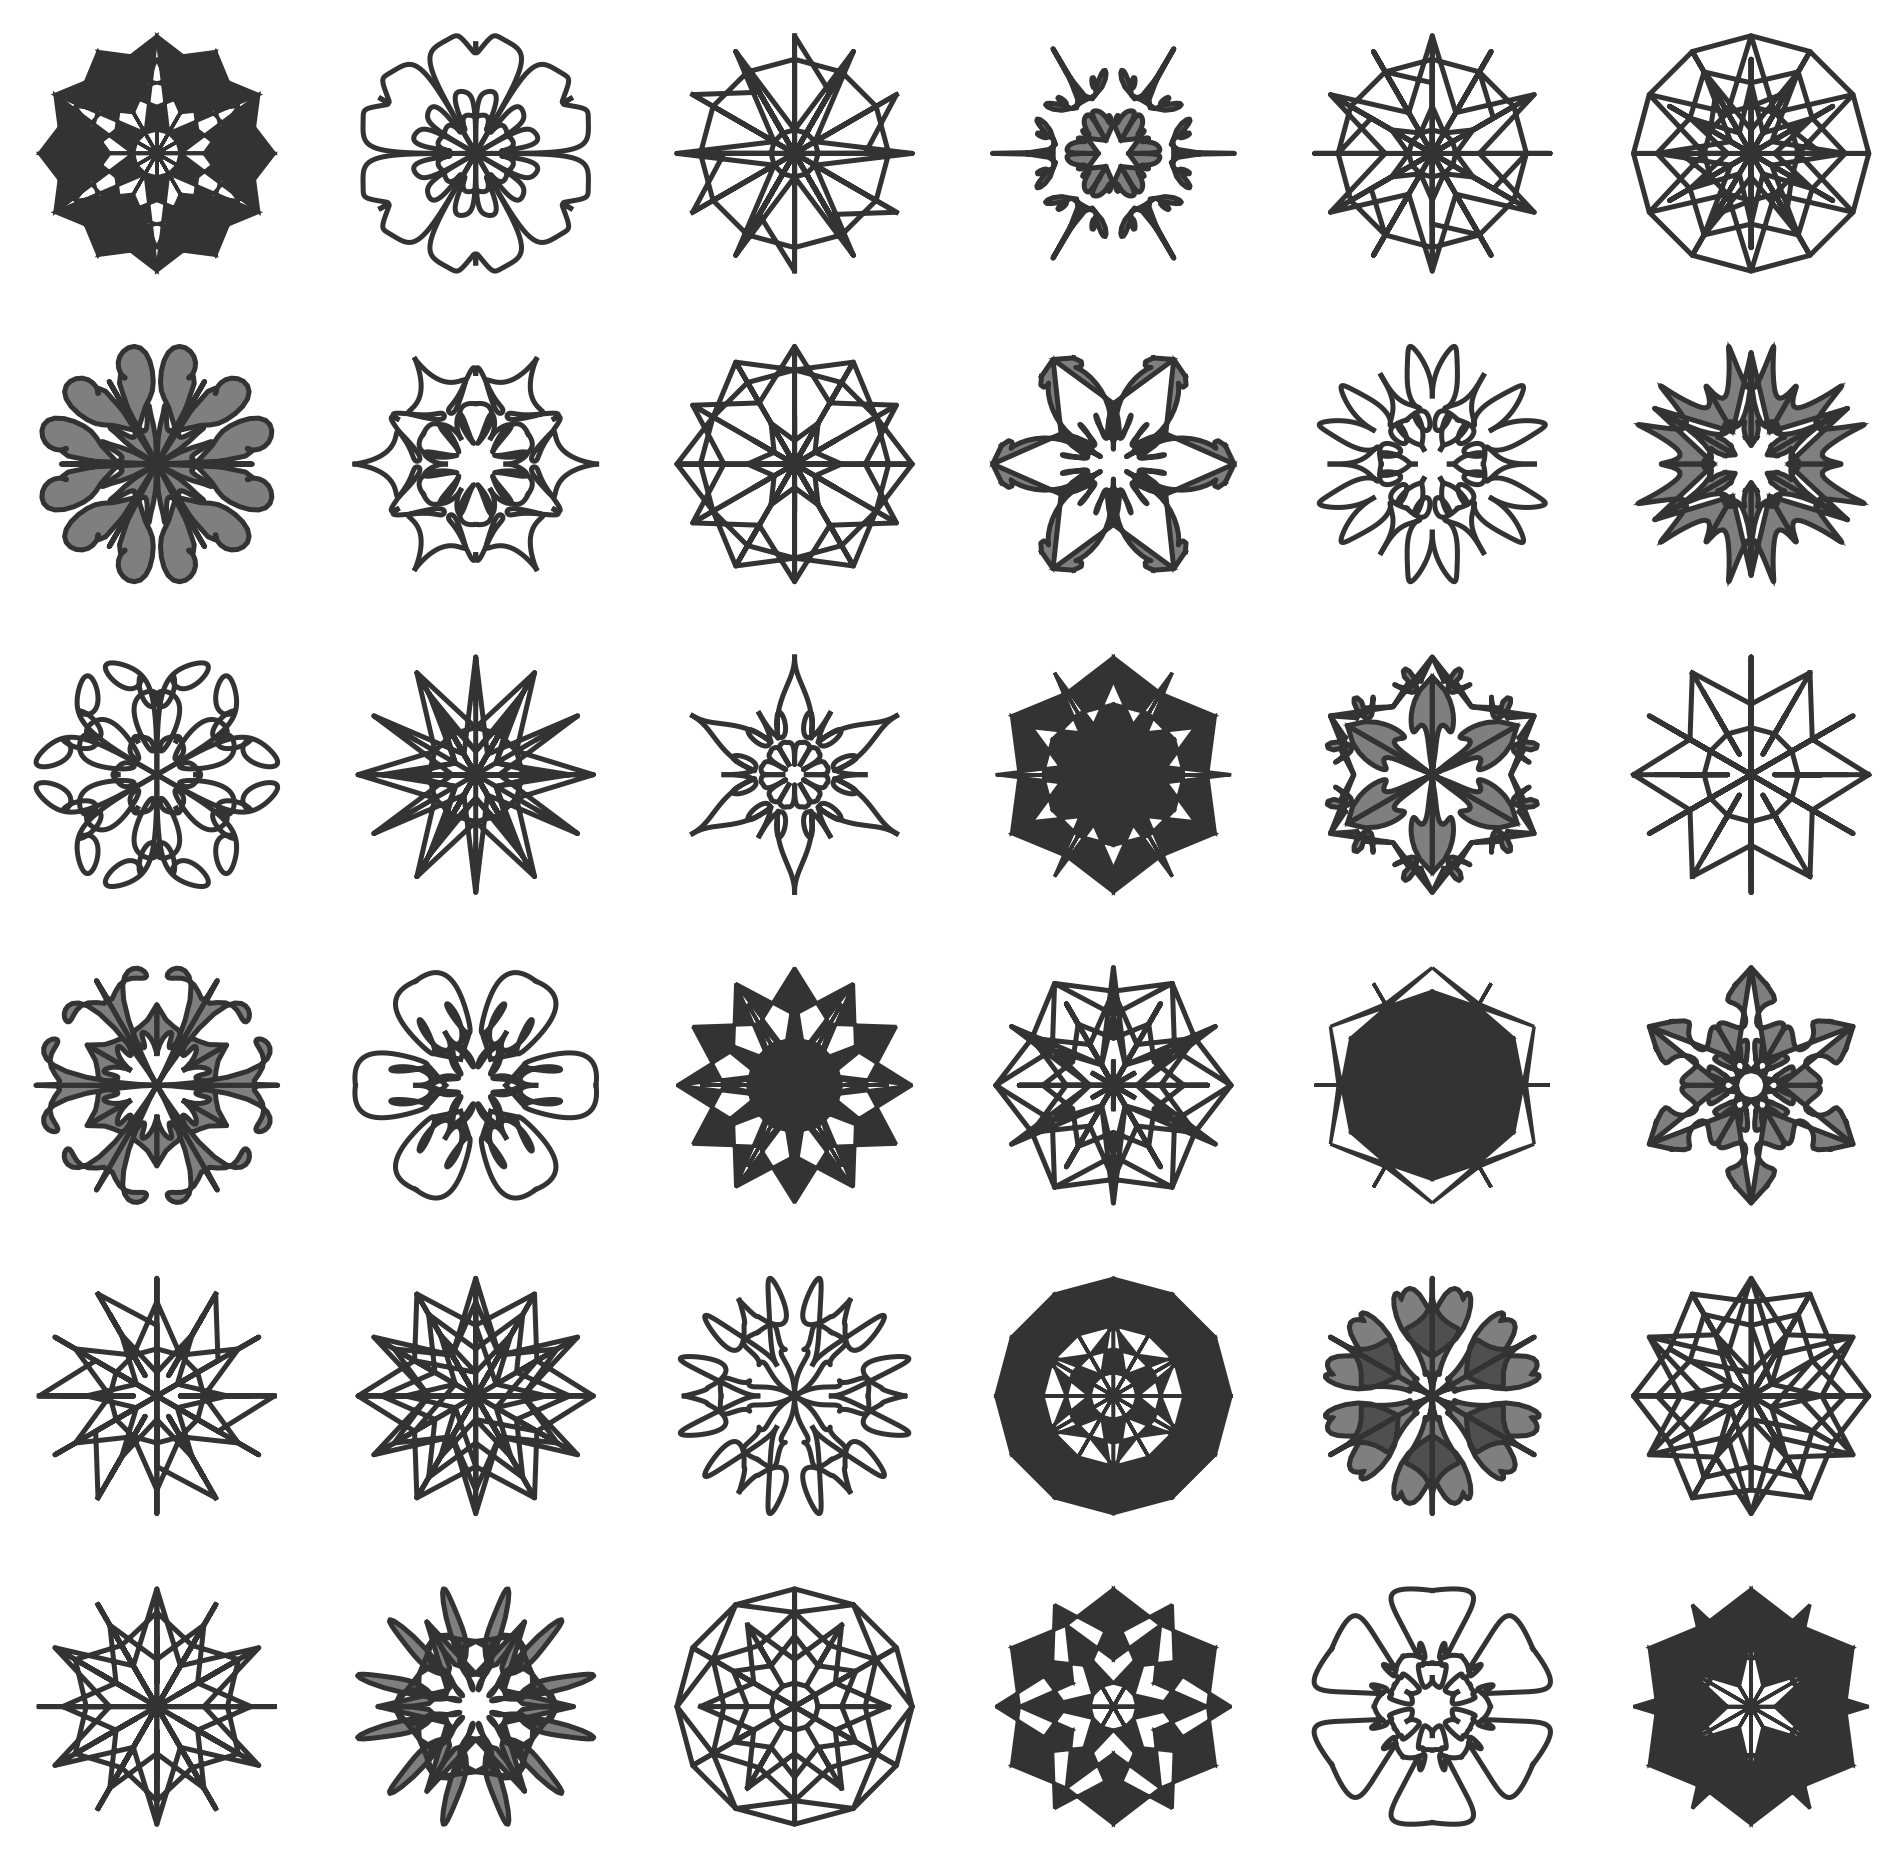

In [43]:
random.seed(124)
fig=random_mandala(n_rows=6, n_columns=6, figsize=(10,10), dpi=240)

## A table of colorized mandalas

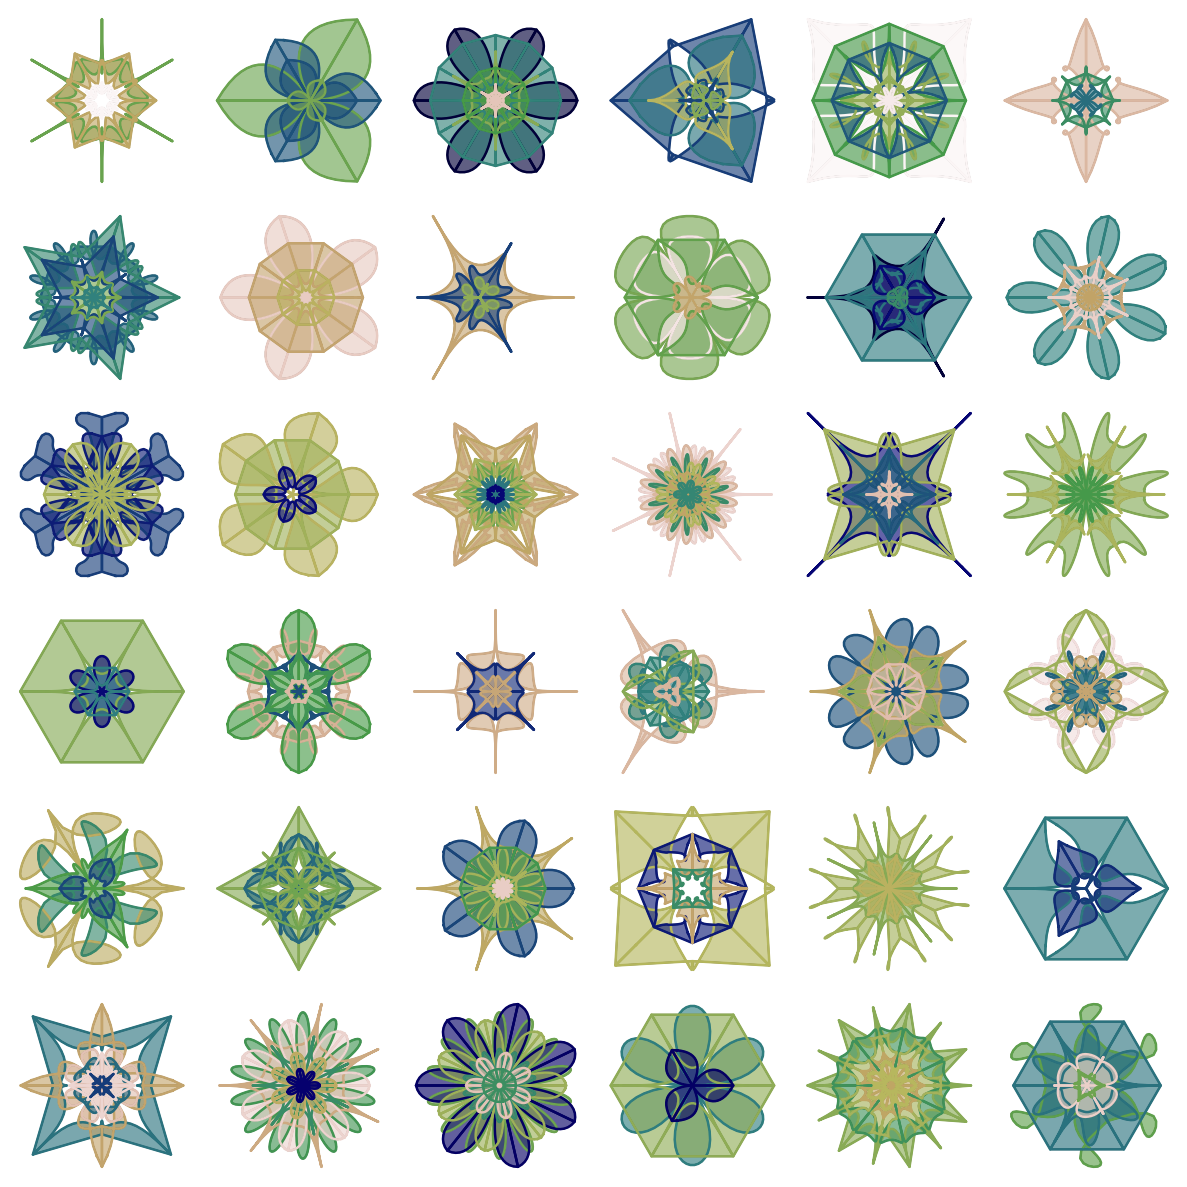

In [44]:
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=120)
k = 1
random.seed(56)
for i in range(36):
    rs=list(range(1,random.choice([3,4,5,6])+1))
    rs.sort()
    rs.reverse()

    fig = random_mandala(connecting_function="bezier_fill",
                         color_mapper=matplotlib.cm.gist_earth,
   						 symmetric_seed=True,
                         radius=rs,
                         rotational_symmetry_order=random.choice([3,4,5,6,7]),
                         number_of_elements=random.choice([2,3,4]),
                         figure=fig,
                         location=(6, 6, k))
    ax = fig.axes[-1]
    ax.set_axis_off()
    k = k + 1

fig.tight_layout()
plt.show()
plt.close(fig)

### A table of open colorized mandalas

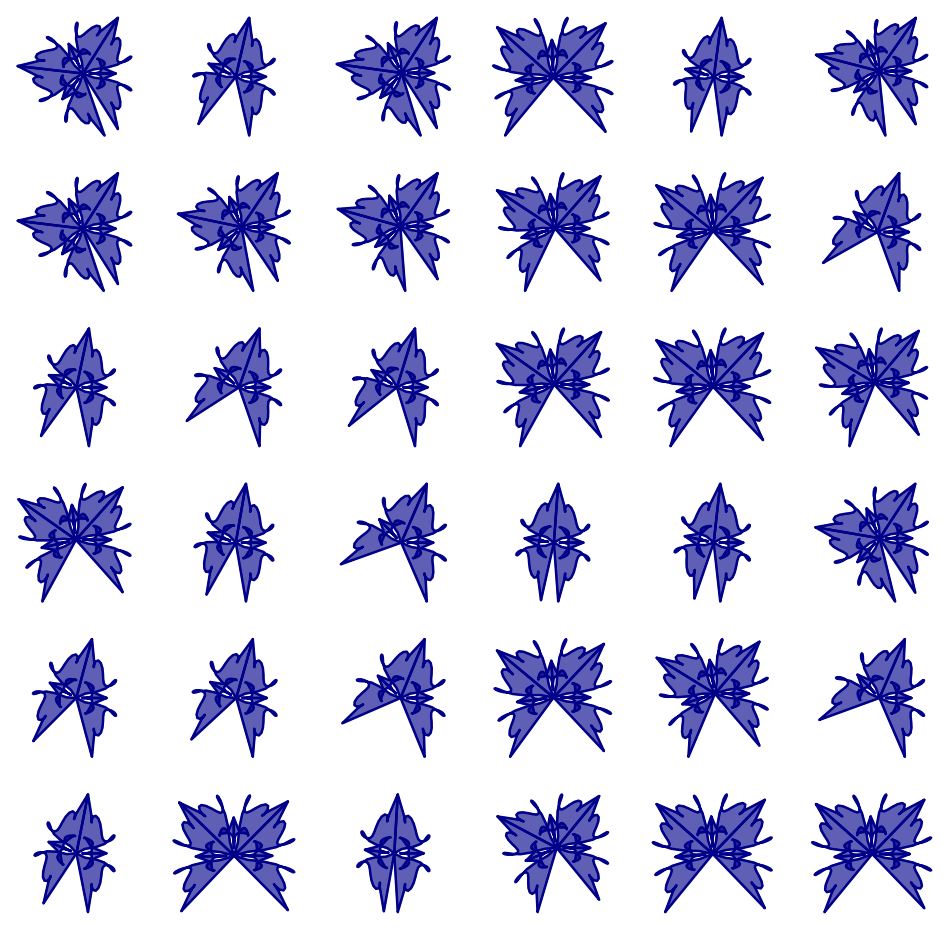

In [45]:
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=120)
k = 1
random.seed(883)
for rso in [2 * random.random() + 2 for _ in range(36)]:
    random.seed(33)
    fig = random_mandala(connecting_function="bezier_fill",
                         radius=3,
                         face_color="darkblue",
                         rotational_symmetry_order=rso,
                         number_of_elements=8,
                         figure=fig,
                         location=(6, 6, k))
    ax = fig.axes[-1]
    ax.set_axis_off()
    k = k + 1

plt.show()
plt.close(fig)

------

## Acknowledgements

- [Johannes Huessy](https://github.com/jhuessy) for discussing different design elements.

- [Mr.T](https://stackoverflow.com/users/8881141/mr-t) for 
  [figuring out and explaining the opacity argument implementation](https://stackoverflow.com/a/71267997/14163984).


------

## References

### Articles

[AA1] Anton Antonov,
["Comparison of dimension reduction algorithms over mandala images generation"](https://mathematicaforprediction.wordpress.com/2017/02/10/comparison-of-dimension-reduction-algorithms-over-mandala-images-generation/),
(2017),
[MathematicaForPrediction at WordPress](https://mathematicaforprediction.wordpress.com).

[AA1] Anton Antonov,
["Generation of Random Bethlehem Stars](https://mathematicaforprediction.wordpress.com/2020/12/21/generation-of-random-bethlehem-stars/),
(2020),
[MathematicaForPrediction at WordPress](https://mathematicaforprediction.wordpress.com).

### Functions

[AAf1] Anton Antonov,
[`RandomMandala`](https://resources.wolframcloud.com/FunctionRepository/resources/RandomMandala),
(2019),
[Wolfram Function Repository](https://resources.wolframcloud.com/FunctionRepository).

[AAf2] Anton Antonov,
[`RandomScribble`](https://resources.wolframcloud.com/FunctionRepository/resources/RandomScribble),
(2020),
[Wolfram Function Repository](https://resources.wolframcloud.com/FunctionRepository).

### Packages

[DHp1] Daniel Hermes,
[`bezier` Python package](https://pypi.org/project/bezier/),
(2016),
[PyPy.org](https://pypi.org).
